**SVM Based Program - Water Quality Classification**

In [10]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib
from google.colab import drive

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import StratifiedKFold

import seaborn as sb

drive.mount('/content/drive')
print ('AUM AMRITESWARYAI NAMAH')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
AUM AMRITESWARYAI NAMAH


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## load file

In [12]:
'''# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Amritanand/BTechFinalProject/TVMwaterEditedFinal3.csv') '''

"# Importing the dataset\ndataset = pd.read_csv('/content/drive/MyDrive/Amritanand/BTechFinalProject/TVMwaterEditedFinal3.csv') "

In [13]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Projects/Machine Learning Framework for Water Quality/ TVMwaterEditedFinal3.csv')

In [14]:
print(dataset.shape)

(16948, 20)


In [15]:
## Drop unnecessary columns
dataset = dataset.drop(['DistrictName', 'BlockName','PanchayatName', 'VillageName', 'HabitationName', 'Location', 'TypeOfSource', 'Tested Year', 'Tested Month'], axis = 1)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16948 entries, 0 to 16947
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Turbidity  16948 non-null  float64
 1   Coliform   16948 non-null  float64
 2   Manganese  16948 non-null  float64
 3   Iron       16948 non-null  float64
 4   Nitrate    16948 non-null  float64
 5   Fluoride   16948 non-null  float64
 6   Chloride   16948 non-null  float64
 7   TDS        16948 non-null  float64
 8   pH         16948 non-null  float64
 9   Hardness   16948 non-null  float64
 10  WQI group  16948 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.4+ MB
None


In [16]:
## Check if any NaN value present
print(dataset.isnull().values.any())
print(dataset[dataset.isna().any(axis=1)])

False
Empty DataFrame
Columns: [Turbidity, Coliform, Manganese, Iron, Nitrate, Fluoride, Chloride, TDS, pH, Hardness, WQI group]
Index: []


In [17]:
## To drop rows with NaN values
dataset = dataset.dropna()

## To check and confirm abscence of NaN
print(dataset.isnull().values.any())

False


In [18]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16948 entries, 0 to 16947
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Turbidity  16948 non-null  float64
 1   Coliform   16948 non-null  float64
 2   Manganese  16948 non-null  float64
 3   Iron       16948 non-null  float64
 4   Nitrate    16948 non-null  float64
 5   Fluoride   16948 non-null  float64
 6   Chloride   16948 non-null  float64
 7   TDS        16948 non-null  float64
 8   pH         16948 non-null  float64
 9   Hardness   16948 non-null  float64
 10  WQI group  16948 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.4+ MB
None


##Understanding the data

In [19]:
print(dataset.head())
print(dataset.describe())
print(dataset.info())

   Turbidity  Coliform  Manganese  Iron  Nitrate  Fluoride  Chloride    TDS  \
0       1.06      20.0       0.01  0.04     2.17      0.44      36.0   40.0   
1       0.45      93.0       0.01  0.07     1.29      0.18      16.0   28.9   
2       0.24       0.0       0.01  0.00     0.17      0.21     148.0  228.0   
3       3.06      28.0       0.01  0.07     0.96      0.20      32.0   83.2   
4       3.71      93.0       0.01  0.03     1.65      0.23      48.0   76.6   

     pH  Hardness   WQI group  
0  5.27      12.0  Unsuitable  
1  5.16      16.0  Unsuitable  
2  6.28      40.0        Good  
3  5.70      80.0  Unsuitable  
4  5.32      12.0  Unsuitable  
          Turbidity      Coliform     Manganese          Iron       Nitrate  \
count  16948.000000  16948.000000  16948.000000  16948.000000  16948.000000   
mean       3.441177    279.551381      0.010296      0.114336      4.134908   
std       14.480779    436.050972      0.016689      0.352910      4.852542   
min        0.0000

## Selecting class labels, and featureset

In [20]:
y = dataset['WQI group']
X = dataset.drop(['WQI group'], axis = 1)
# X = dataset.iloc[row_index_start:row_index_stop]
# X = X.drop('id', axis = 1)
print(X.head())
print(y.head())

   Turbidity  Coliform  Manganese  Iron  Nitrate  Fluoride  Chloride    TDS  \
0       1.06      20.0       0.01  0.04     2.17      0.44      36.0   40.0   
1       0.45      93.0       0.01  0.07     1.29      0.18      16.0   28.9   
2       0.24       0.0       0.01  0.00     0.17      0.21     148.0  228.0   
3       3.06      28.0       0.01  0.07     0.96      0.20      32.0   83.2   
4       3.71      93.0       0.01  0.03     1.65      0.23      48.0   76.6   

     pH  Hardness  
0  5.27      12.0  
1  5.16      16.0  
2  6.28      40.0  
3  5.70      80.0  
4  5.32      12.0  
0    Unsuitable
1    Unsuitable
2          Good
3    Unsuitable
4    Unsuitable
Name: WQI group, dtype: object


## Understanding the dataset

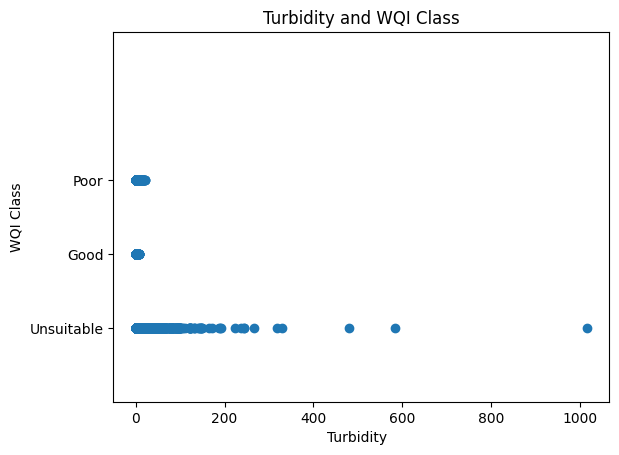

In [21]:
# Visualising the relationship between Turbidity and WQI Class
plt.scatter(dataset['Turbidity'], dataset['WQI group'])
#plt.scatter(X['PanchayatName'], y, c=y, marker='o')
plt.title('Turbidity and WQI Class')
plt.xlabel('Turbidity  ')
plt.ylabel('WQI Class')
plt.ylim(-1,4)
plt.show()



#https://stackoverflow.com/questions/47006268/matplotlib-scatter-plot-with-color-label-and-legend-specified-by-c-option

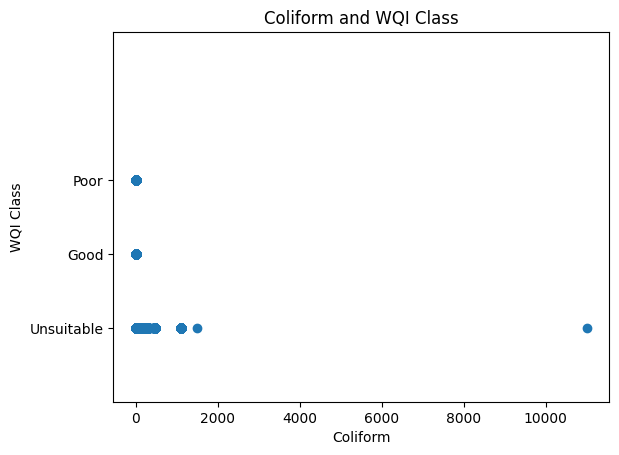

In [22]:
# Visualising the relationship between Coliform and WQI Class
plt.scatter(dataset['Coliform'], dataset['WQI group'])
#plt.scatter(X['PanchayatName'], y, c=y, marker='o')
plt.title('Coliform and WQI Class')
plt.xlabel('Coliform')
plt.ylabel('WQI Class')
plt.ylim(-1,4)
plt.show()



#https://stackoverflow.com/questions/47006268/matplotlib-scatter-plot-with-color-label-and-legend-specified-by-c-option

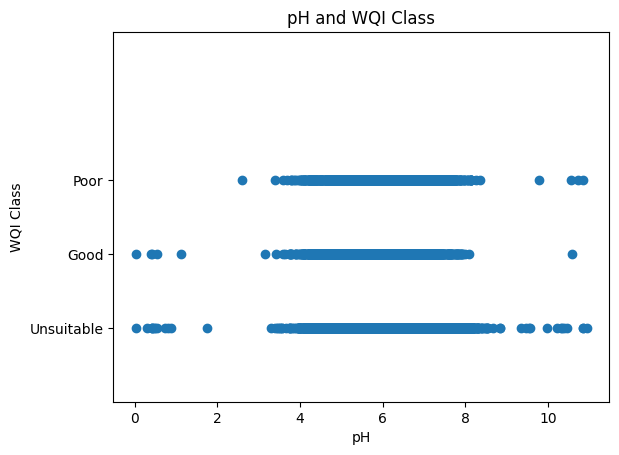

In [23]:
# Visualising the relationship between pH and WQI Class
plt.scatter(dataset['pH'], dataset['WQI group'])
#plt.scatter(X['PanchayatName'], y, c=y, marker='o')
plt.title('pH and WQI Class')
plt.xlabel('pH')
plt.ylabel('WQI Class')
plt.ylim(-1,4)
plt.show()



#https://stackoverflow.com/questions/47006268/matplotlib-scatter-plot-with-color-label-and-legend-specified-by-c-option

In [24]:
#pcoef = np.corrcoef(X)
#print(pcoef)

#fig, ax = plt.subplots(nrows=1, ncols=9, figsize=(12, 3))
#for i in range(0,2):
   # ax[i].scatter(X[0,],X[1+i,])
 #   ax[i].title.set_text('Correlation = ' + "{:.2f}".format(pcoef[0,i+1]))
  #  ax[i].set(xlabel='x',ylabel='y')
#fig.subplots_adjust(wspace=.4)
#plt.show()

In [25]:
pearsoncorr = X.corr(method='pearson')
pearsoncorr

,Turbidity,Coliform,Manganese,Iron,Nitrate,Fluoride,Chloride,TDS,pH,Hardness
Turbidity,1.000000,0.050555,0.001045,0.140628,-0.006422,0.016623,-0.001704,-0.000355,0.062127,0.010653
Coliform,0.050555,1.000000,-0.007535,0.042719,-0.015167,0.089202,-0.006924,0.024914,0.087656,0.028347
Manganese,0.001045,-0.007535,1.000000,-0.000084,-0.010957,0.017362,-0.002935,-0.005209,0.007833,-0.002007
Iron,0.140628,0.042719,-0.000084,1.000000,-0.033283,0.034382,-0.003863,0.001003,0.008110,0.012060
Nitrate,-0.006422,-0.015167,-0.010957,-0.033283,1.000000,0.092247,0.167288,0.227302,-0.025801,0.248088
Fluoride,0.016623,0.089202,0.017362,0.034382,0.092247,1.000000,0.031830,0.061528,0.047716,0.087116
Chloride,-0.001704,-0.006924,-0.002935,-0.003863,0.167288,0.031830,1.000000,0.820185,0.064152,0.602880
TDS,-0.000355,0.024914,-0.005209,0.001003,0.227302,0.061528,0.820185,1.000000,0.124564,0.648205
pH,0.062127,0.087656,0.007833,0.008110,-0.025801,0.047716,0.064152,0.124564,1.000000,0.244380
Hardness,0.010653,0.028347,-0.002007,0.012060,0.248088,0.087116,0.602880,0.648205,0.244380,1.000000


<Axes: >

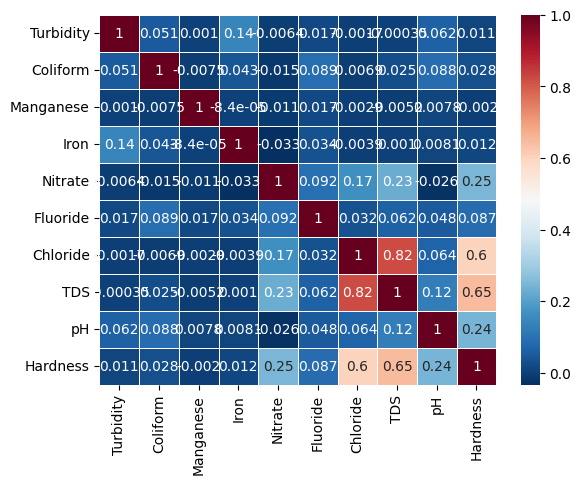

In [26]:
sb.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [27]:
#Import svm package from sklearn
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', C=1e-0, gamma=1e-3) # Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

print(classification_report(y_test, y_pred))

['Good' 'Good' 'Unsuitable' ... 'Unsuitable' 'Unsuitable' 'Unsuitable']
              precision    recall  f1-score   support

        Good       0.85      0.94      0.89      1086
        Poor       0.86      0.71      0.78       831
  Unsuitable       0.97      0.98      0.97      3168

    accuracy                           0.93      5085
   macro avg       0.89      0.88      0.88      5085
weighted avg       0.93      0.93      0.93      5085



In [28]:
print(y_train.head(5))

1662           Poor
7759     Unsuitable
13564    Unsuitable
15527    Unsuitable
6263     Unsuitable
Name: WQI group, dtype: object


In [29]:
print(X_train.info())
print(X_test.info())
print(y_train.head())
print(y_test.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11863 entries, 1662 to 2732
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Turbidity  11863 non-null  float64
 1   Coliform   11863 non-null  float64
 2   Manganese  11863 non-null  float64
 3   Iron       11863 non-null  float64
 4   Nitrate    11863 non-null  float64
 5   Fluoride   11863 non-null  float64
 6   Chloride   11863 non-null  float64
 7   TDS        11863 non-null  float64
 8   pH         11863 non-null  float64
 9   Hardness   11863 non-null  float64
dtypes: float64(10)
memory usage: 1019.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5085 entries, 5818 to 7368
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Turbidity  5085 non-null   float64
 1   Coliform   5085 non-null   float64
 2   Manganese  5085 non-null   float64
 3   Iron       5085 non-null   float64
 4   Nitra

## Evaluate the performance of our model - Confusion Matrix

In [30]:
## Specify number of folds in stratified k-fold
skf = StratifiedKFold(n_splits=3)	# n_Splits stands for number of folds required (2 is the default minimum)
num_of_splits = 3 	# Specify the number of splits required (to calculate the average MAE)

skf.get_n_splits(X, y)
print(skf)


StratifiedKFold(n_splits=3, random_state=None, shuffle=False)


In [31]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
'''
### NOt to be used. -> Backup code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)# Train a SVC model using different kernal
    svclassifier = getClassifier(i)
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernals[i], "kernel")
    print(classification_report(y_test,y_pred))
'''

'\n### NOt to be used. -> Backup code\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)\nkernels = [\'Polynomial\', \'RBF\', \'Sigmoid\',\'Linear\']#A function which returns the corresponding SVC model\ndef getClassifier(ktype):\n    if ktype == 0:\n        # Polynomial kernal\n        return SVC(kernel=\'poly\', degree=8, gamma="auto")\n    elif ktype == 1:\n        # Radial Basis Function kernal\n        return SVC(kernel=\'rbf\', gamma="auto")\n    elif ktype == 2:\n        # Sigmoid kernal\n        return SVC(kernel=\'sigmoid\', gamma="auto")\n    elif ktype == 3:\n        # Linear kernal\n        return SVC(kernel=\'linear\', gamma="auto")\n\nfor i in range(4):\n    # Separate data into test and training sets\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)# Train a SVC model using different kernal\n    svclassifier = getClassifier(i) \n    svclassifier.fit(X_train, y_train)# Make prediction\n    y_pred = svclassifier.pred

In [33]:
### Not to be used now - need revision
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10], 'gamma': [1,0.1],'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,cv=2,verbose=3)
grid.fit(X_train,y_train)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.638 total time=   5.3s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.638 total time=   7.3s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.638 total time=   5.7s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.638 total time=   7.3s
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.651 total time=   5.9s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.651 total time=   5.9s
[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.690 total time=   7.2s
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.689 total time=   6.2s
[CV 1/2] END .........C=10, gamma=1, kernel=rbf;, score=0.652 total time=   7.3s
[CV 2/2] END .........C=10, gamma=1, kernel=rbf;, score=0.652 total time=   5.8s
[CV 1/2] END .......C=10, gamma=0.1, kernel=rbf;, score=0.705 total time=   7.6s
[CV 2/2] END .......C=10, gamma=0.1, kernel=rbf;,

In [34]:
'''
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)
'''

'\nfrom sklearn.cluster import KMeans\n\nkmeans = KMeans(n_clusters=5, random_state=0) \n\nkmeans.fit(X)\n'